In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [17]:
# 1. Load the dataset
df = pd.read_csv("Mall_Customers - Mall_Customers.csv")

In [18]:
# 2. Total number of missing values
missing_values = df.isnull().sum().sum()

In [19]:
# 3. Replace missing values
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical_features = ['Gender']

for feature in numerical_features:
    df[feature].fillna(df[feature].mean(), inplace=True)

for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

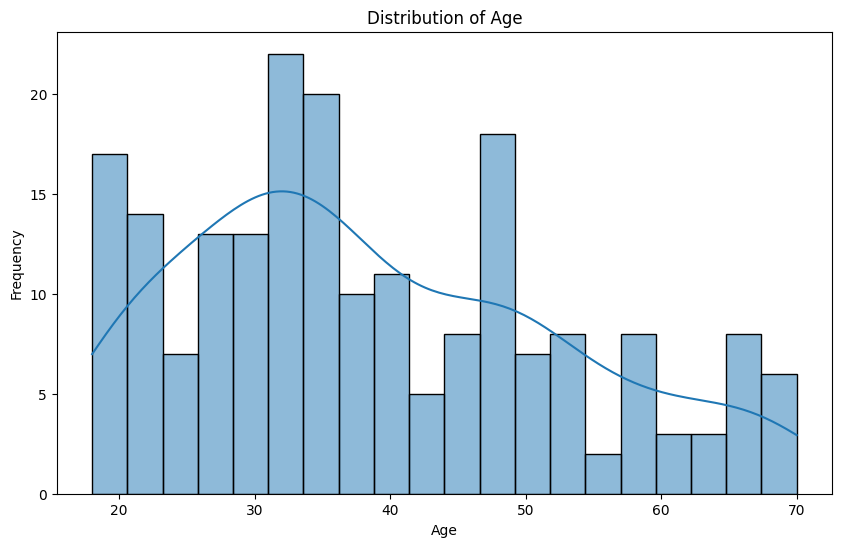

In [20]:
# 4. Distribution of the 'Age' feature
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [21]:
# 5. Highest correlation with 'Spending Score'
correlation = df.corr()['Spending Score (1-100)'].abs().sort_values(ascending=False).index[1]

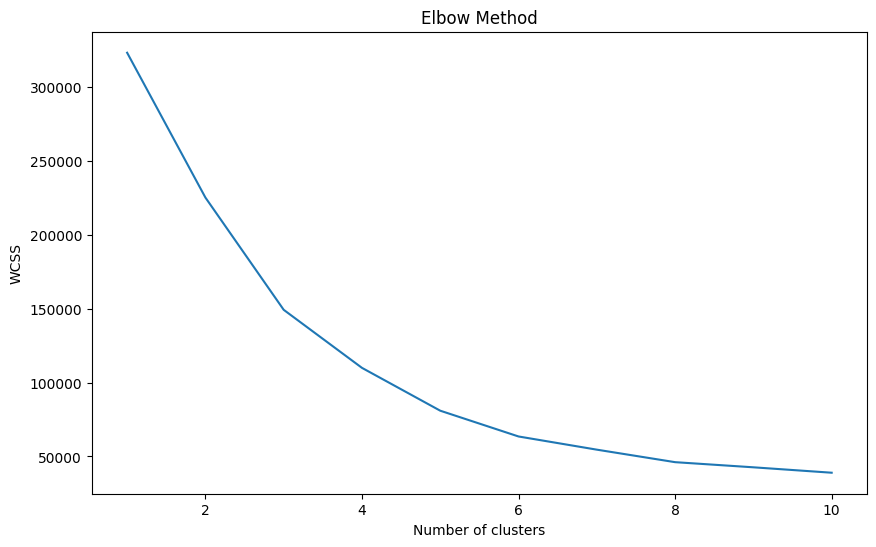

In [22]:
# 6. Optimal number of clusters
X = df.drop(['CustomerID', 'Gender'], axis=1)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# 7. Average annual income of customers
average_annual_income = df['Annual Income (k$)'].mean()

In [24]:
# 8. Average spending score of male customers
average_spending_score_male = df[df['Gender'] == 'Male']['Spending Score (1-100)'].mean()

In [25]:
# 9. Cluster with highest average income and spending score
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

cluster_with_highest_income_and_spending = df.groupby('Cluster').mean().idxmax()

In [26]:
# 10. Percentage of customers in Cluster 1
percentage_cluster1 = (df['Cluster'].value_counts(normalize=True) * 100)[1]

In [27]:
# 11. Most frequent age group in Cluster 2
most_frequent_age_group_cluster2 = df[df['Cluster'] == 2]['Age'].mode()[0]

In [28]:
# 12. Average income of customers in Cluster 3
average_income_cluster3 = df[df['Cluster'] == 3]['Annual Income (k$)'].mean()

In [29]:
# 13. Count of values in each cluster
cluster_counts = df['Cluster'].value_counts()

print("Total number of missing values:", missing_values)
print("Highest correlation with 'Spending Score':", correlation)
print("Average annual income of customers:", average_annual_income)
print("Average spending score of male customers:", average_spending_score_male)
print("Cluster with highest average income and spending score:", cluster_with_highest_income_and_spending)
print("Percentage of customers in Cluster 1:", percentage_cluster1)
print("Most frequent age group in Cluster 2:", most_frequent_age_group_cluster2)
print("Average income of customers in Cluster 3:", average_income_cluster3)
print("Count of values in each cluster:", cluster_counts)

Total number of missing values: 3
Highest correlation with 'Spending Score': Age
Average annual income of customers: 61.31683168316832
Average spending score of male customers: 48.17977528089887
Cluster with highest average income and spending score: CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    2
dtype: int64
Percentage of customers in Cluster 1: 61.083743842364534
Most frequent age group in Cluster 2: 32.0
Average income of customers in Cluster 3: nan
Count of values in each cluster: 1    124
2     40
0     39
Name: Cluster, dtype: int64


In [30]:
# 14. Show customers from each cluster
clustered_customers = df.groupby('Cluster')

for cluster, data in clustered_customers:
    print(f"Cluster {cluster}:")
    print(data)
    print("\n")

Cluster 0:
     CustomerID  Gender        Age  Annual Income (k$)  \
124         125  Female  23.000000                70.0   
126         127    Male  43.000000                71.0   
128         129    Male  59.000000                71.0   
130         131    Male  47.000000                71.0   
132         133  Female  25.000000                72.0   
134         135    Male  20.000000                73.0   
136         137  Female  44.000000                73.0   
138         139    Male  19.000000                74.0   
140         141  Female  57.000000                75.0   
142         143  Female  28.000000                76.0   
144         145    Male  25.000000                77.0   
146         147    Male  48.000000                77.0   
148         149  Female  34.000000                78.0   
150         151    Male  43.000000                78.0   
152         153  Female  44.000000                78.0   
154         155  Female  47.000000                78.0   
156

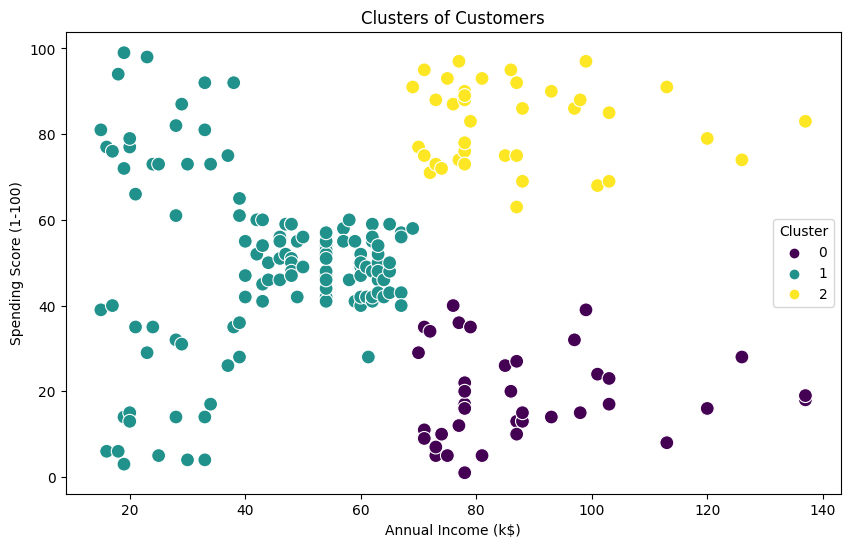

In [31]:
# 15. Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()